In [26]:
import numpy as np
import matplotlib.pyplot as plt
import SpectralSynthesis as ss
import DeltaVar as dv

In [27]:
N=1000
sigma = 1.0
H = 1.0
n=1

In [28]:
X = []
for i in range(n):
    X.append(ss.fBm(N,2,H,sigma,exp=False))
    if i%10 == 0:
        print(i)

C:\Users\C1764397\Workshop\PhD\Scripts\SpectralSynthesis.py:57: RuntimeWarning: divide by zero encountered in power
  rad = np.where(k>0.0,k**(-(beta*0.5)),0.0)


0


In [29]:
X = np.asarray(X)

In [30]:
print(np.shape(X))

(1, 1000, 1000)


In [31]:
L = 10**(np.linspace(-1.6,np.log10(0.1), 100))
v = 1.5

In [32]:
deltavar = []
for i in range(n):
    deltavar_i = []
    for j in range(len(L)):
        deltavar_i.append(dv.DeltaVar(X[i,:,:],L[j],v, method = 'convolve'))
        if j%10 == 0:
            print(str(i)+':'+str(j))
    deltavar.append(np.asarray(deltavar_i))
    
deltavar = np.asarray(deltavar)

0:0
0:10
0:20
0:30
0:40
0:50
0:60
0:70
0:80
0:90


In [33]:
print(deltavar)

[[  6.37211584e+07   6.50749595e+07   6.64615857e+07   6.78818584e+07
    6.93366189e+07   7.08267292e+07   7.23530724e+07   7.39165538e+07
    7.55181013e+07   7.71586662e+07   7.88392242e+07   8.05607763e+07
    8.23243491e+07   8.41309968e+07   8.59818009e+07   8.78778724e+07
    8.98203518e+07   9.18104111e+07   9.38492540e+07   9.59381178e+07
    9.80782740e+07   1.00271030e+08   1.02517729e+08   1.04819752e+08
    1.07178522e+08   1.09595497e+08   1.12072180e+08   1.14610115e+08
    1.17210889e+08   1.19876132e+08   1.22607522e+08   1.25406779e+08
    1.28275672e+08   1.31216015e+08   1.34229669e+08   1.37318543e+08
    1.40484593e+08   1.43729823e+08   1.47056283e+08   1.50466070e+08
    1.53961326e+08   1.57544240e+08   1.61217043e+08   1.64982011e+08
    1.68841461e+08   1.72797751e+08   1.76853276e+08   1.81010472e+08
    1.85271808e+08   1.89639787e+08   1.94116947e+08   1.98705852e+08
    2.03409099e+08   2.08229310e+08   2.13169133e+08   2.18231240e+08
    2.23418326e+08  

In [34]:
print(deltavar[0])

[  6.37211584e+07   6.50749595e+07   6.64615857e+07   6.78818584e+07
   6.93366189e+07   7.08267292e+07   7.23530724e+07   7.39165538e+07
   7.55181013e+07   7.71586662e+07   7.88392242e+07   8.05607763e+07
   8.23243491e+07   8.41309968e+07   8.59818009e+07   8.78778724e+07
   8.98203518e+07   9.18104111e+07   9.38492540e+07   9.59381178e+07
   9.80782740e+07   1.00271030e+08   1.02517729e+08   1.04819752e+08
   1.07178522e+08   1.09595497e+08   1.12072180e+08   1.14610115e+08
   1.17210889e+08   1.19876132e+08   1.22607522e+08   1.25406779e+08
   1.28275672e+08   1.31216015e+08   1.34229669e+08   1.37318543e+08
   1.40484593e+08   1.43729823e+08   1.47056283e+08   1.50466070e+08
   1.53961326e+08   1.57544240e+08   1.61217043e+08   1.64982011e+08
   1.68841461e+08   1.72797751e+08   1.76853276e+08   1.81010472e+08
   1.85271808e+08   1.89639787e+08   1.94116947e+08   1.98705852e+08
   2.03409099e+08   2.08229310e+08   2.13169133e+08   2.18231240e+08
   2.23418326e+08   2.28733107e+08

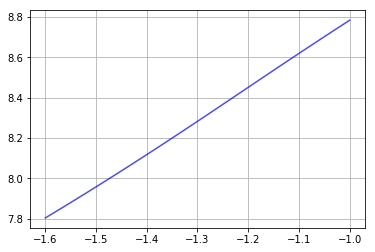

In [35]:
plt.figure()
for i in range(len(deltavar)):
    plt.plot(np.log10(L),np.log10(deltavar[i]),'b', alpha = 0.7)
plt.grid()
plt.show()

In [36]:
params = []
for i in range((len(deltavar))):
    params.append(dv.HurstEstimator(deltavar[i],L))
    if i%10 == 0:
        print(i)
params = np.asarray(params)

0


In [37]:
print(np.shape(params))

(1, 3, 2)


In [38]:
print(params)

[[[  8.23585550e-01   1.12535503e-03]
  [  1.64717110e+00   2.25071007e-03]
  [  1.04285805e+01   2.95229858e-03]]]


In [39]:
H_est = params[:,0,:]

In [40]:
print(H_est)

[[ 0.82358555  0.00112536]]


In [41]:
print(np.shape(H_est))

(1, 2)


In [42]:
std=H_est[:,1]

In [43]:
print(std)

[ 0.00112536]


In [44]:
H_est = H_est[:,0]

In [45]:
print(H_est)

[ 0.82358555]


In [46]:
var = std**2

In [47]:
print(var)

[  1.26642395e-06]


In [48]:
HMean = np.mean(H_est)
varMean = np.mean(var)

In [49]:
std = np.sqrt(varMean)

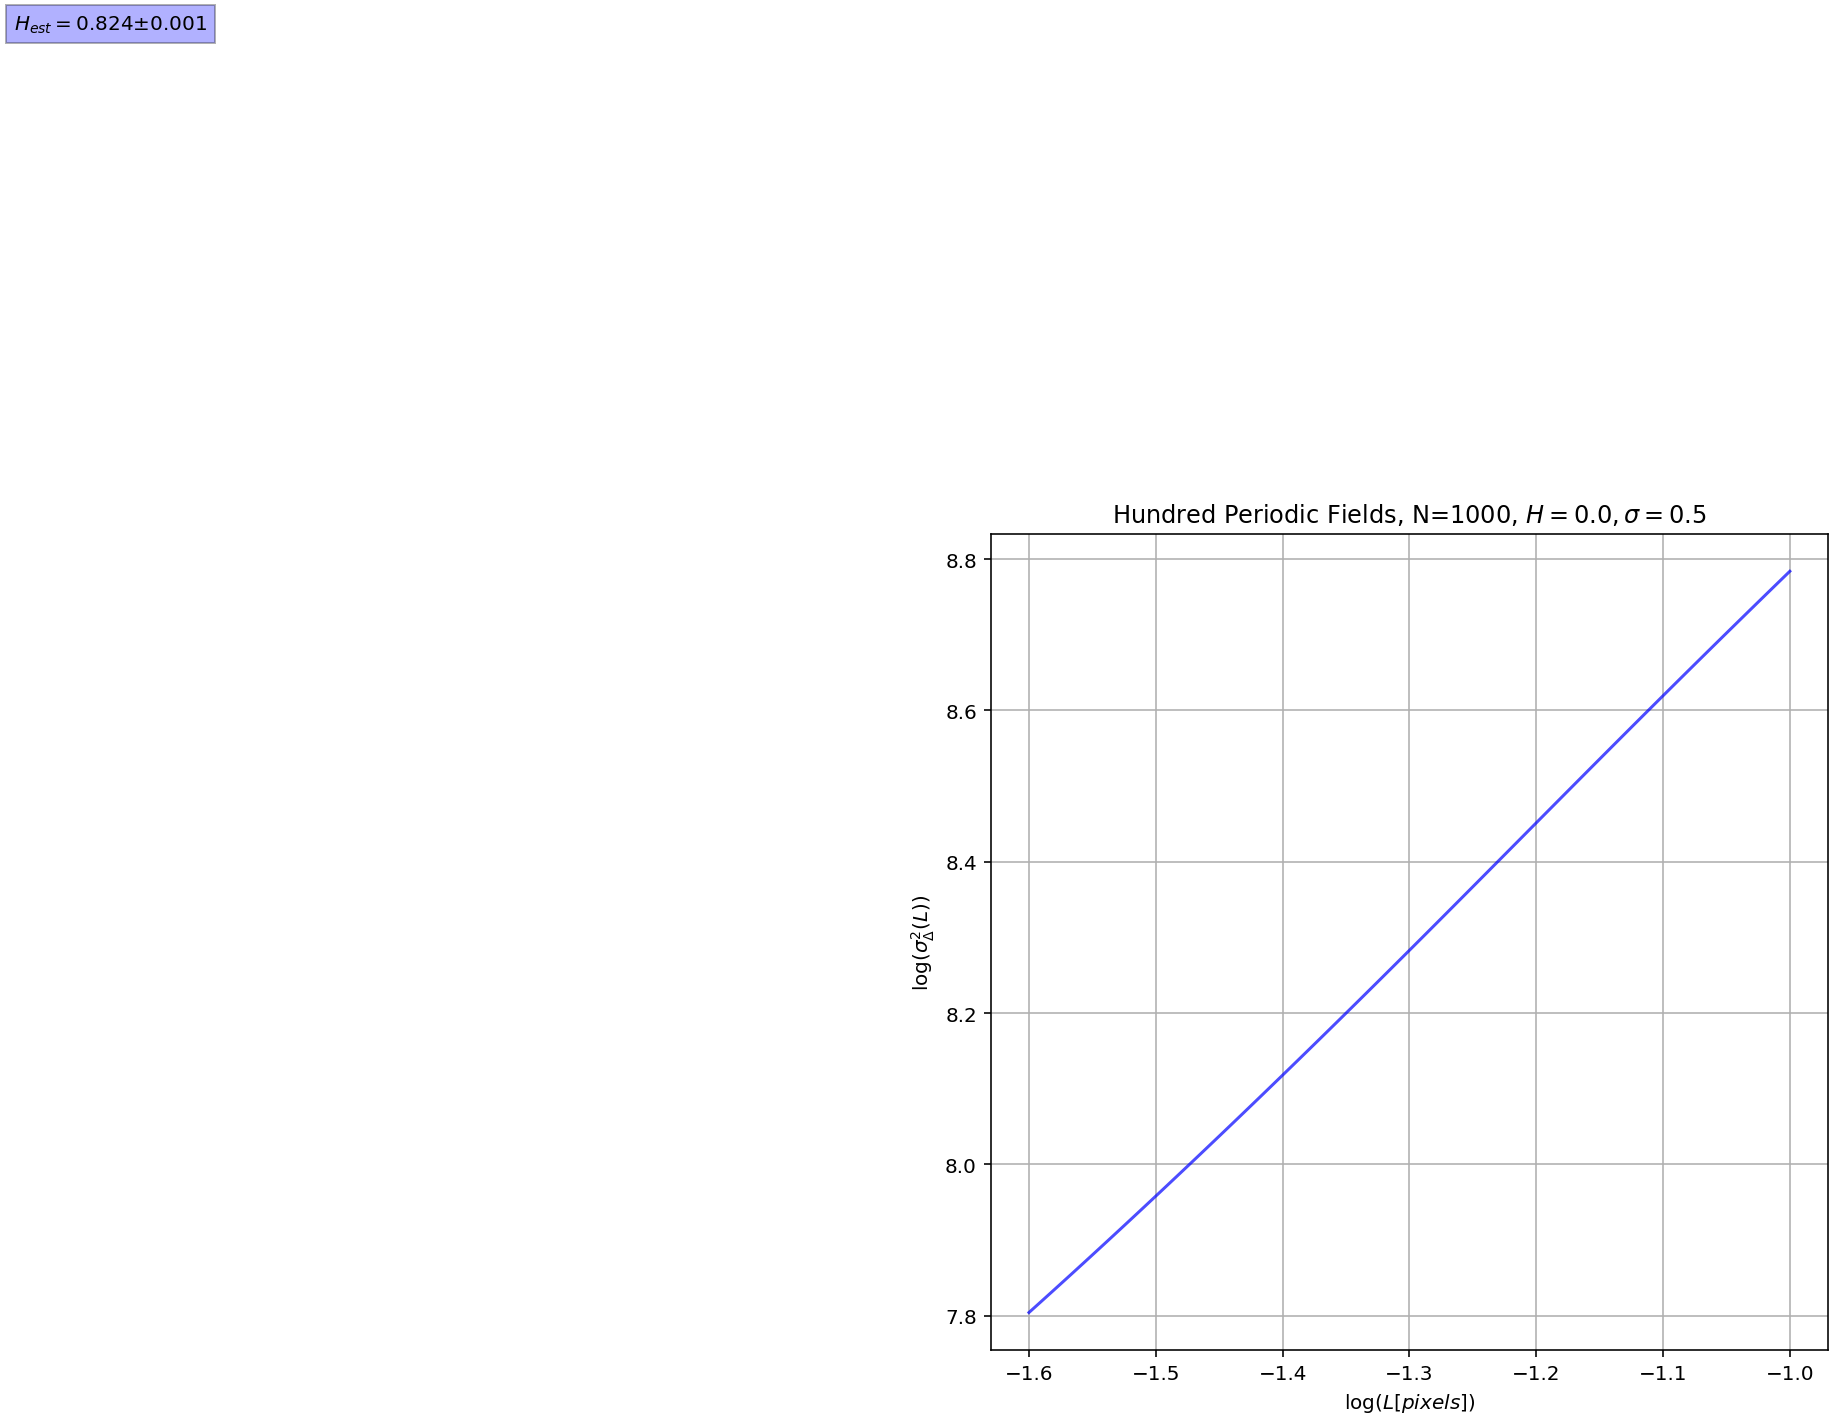

In [50]:
plt.figure(figsize=(1080/144, 1080/144), dpi=144)
for i in range(len(deltavar)):
    plt.plot(np.log10(L),np.log10(deltavar[i]),'b', alpha = 0.7)
plt.text(-2.4,9.5, r'$H_{est}= $'+'%.3f'%HMean+r'$\pm %.3f$'%std, bbox=dict(facecolor='blue', alpha=0.3))
plt.title(r'Hundred Periodic Fields, N=1000, $H = 0.0, \sigma = 0.5$')
plt.grid()
plt.ylabel(r'$\log(\sigma^2_\Delta(L))$')
plt.xlabel(r'$\log(L[pixels])$')
#plt.savefig('../SpectralSynthesis/MiscImages/DeltaVarPeriodicHSmallSigmaSmallHundred',bbox_inches="tight")
plt.show()